# OVERVIEW

Banks generate significant revenue through loan lending, but this comes with inherent risks, as borrowers may default on their loans. To address this, banks are leveraging Machine Learning (ML) to predict the liklihood of loan defaults. The goal is to analyze the historical data on borrowers, experiment with different machine learning models, and determine which model performs the best in predicting whether a new borrower is likely to default.

# *EDA* (Data Understanding)

In [166]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [167]:
# Load the dataset
df = pd.read_csv('sample_data/data/Loan_Default.csv')
# Create a clean copy of the dataframe
df_clean=df.copy()

In [168]:
# Display the first few rows of the cleaned dataframe
df_clean.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [169]:
# Display summary information about the cleaned dataframe
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [170]:
# Get the dimensions (rows, columns) of the cleaned dataframe
df_clean.shape

(148670, 34)

In [171]:
# Normalized value counts of y, rounded.
print(f'{df_clean.Status.value_counts(normalize=True).round(3)}')

Status
0    0.754
1    0.246
Name: proportion, dtype: float64


In [172]:
# Display summary information of rows where "Status" is 1 in the cleaned dataframe
df_clean[df_clean["Status"] == 1].info()

<class 'pandas.core.frame.DataFrame'>
Index: 36639 entries, 0 to 148663
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         36639 non-null  int64  
 1   year                       36639 non-null  int64  
 2   loan_limit                 35758 non-null  object 
 3   Gender                     36639 non-null  object 
 4   approv_in_adv              36398 non-null  object 
 5   loan_type                  36639 non-null  object 
 6   loan_purpose               36604 non-null  object 
 7   Credit_Worthiness          36639 non-null  object 
 8   open_credit                36639 non-null  object 
 9   business_or_commercial     36639 non-null  object 
 10  loan_amount                36639 non-null  int64  
 11  rate_of_interest           200 non-null    float64
 12  Interest_rate_spread       0 non-null      float64
 13  Upfront_charges            153 non-null    float64

In [173]:
# Check for missing values in each column of the cleaned dataframe
df_clean.isnull().sum()

,0
ID,0
year,0
loan_limit,3344
Gender,0
approv_in_adv,908
loan_type,0
loan_purpose,134
Credit_Worthiness,0
open_credit,0
business_or_commercial,0


In [174]:
# Check for the number of duplicate rows in the cleaned dataframe
df_clean.duplicated().sum()

np.int64(0)

# **Data Preparation**

In [175]:
# drop the columns which have too many null values
df_clean = df_clean.drop(["rate_of_interest", "Interest_rate_spread", "Upfront_charges", "property_value", "LTV", "dtir1"], axis=1)
df_clean.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,Region,Security_Type,Status
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,1U,1740.0,EXP,758,CIB,25-34,to_inst,south,direct,1
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,1U,4980.0,EQUI,552,EXP,55-64,to_inst,North,direct,1
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,1U,9480.0,EXP,834,CIB,35-44,to_inst,south,direct,0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,1U,11880.0,EXP,587,CIB,45-54,not_inst,North,direct,0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,1U,10440.0,CRIF,602,EXP,25-34,not_inst,North,direct,0


In [176]:
# drop ID and year
df_clean = df_clean.drop(["ID", "year"], axis=1)

In [177]:
# Drop rows with missing values from the cleaned dataframe
df_clean = df_clean.dropna(axis=0)

# Get the new dimensions (rows, columns) of the cleaned dataframe after dropping missing values
df_clean.shape

(135108, 26)

In [178]:
# Check for missing values again
df_clean.isnull().sum()

,0
loan_limit,0
Gender,0
approv_in_adv,0
loan_type,0
loan_purpose,0
Credit_Worthiness,0
open_credit,0
business_or_commercial,0
loan_amount,0
term,0


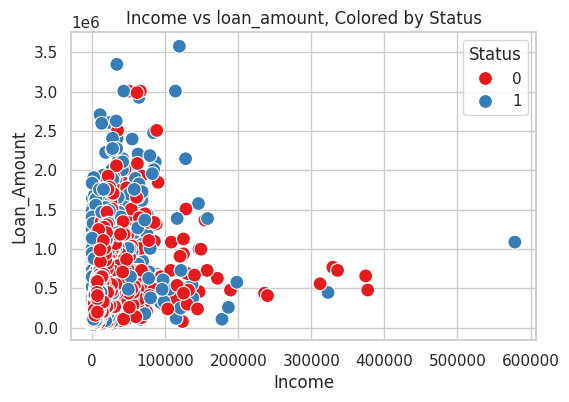

In [179]:
# Scatter plot for Income vs Salary, color-coded by Status
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_clean, x='income', y='loan_amount', hue='Status', palette='Set1', s=100)
plt.title('Income vs loan_amount, Colored by Status')
plt.xlabel('Income')
plt.ylabel('Loan_Amount')
plt.legend(title='Status')
plt.show()


The scatter plot for Income vs Loan Amount, color-coded by Status, reveals that the data points for Status values 0 and 1 are completely overlapping. This suggests that there is no clear separation between these two groups based on the Income and Loan Amount variables

**Implication**: The overlap may indicate that Income and Loan Amount alone do not provide sufficient discrimination between the two Status categories (0 and 1). Further analysis or additional features may be necessary to better distinguish between these groups.



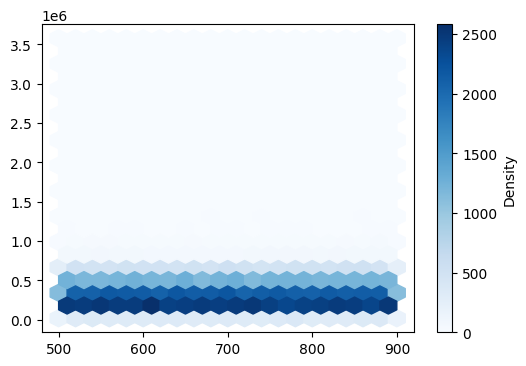

In [29]:
# Hexbin Plot for loan_limit vs loan_amount, color-coded by Status
plt.figure(figsize=(6, 4))
plt.hexbin(df_clean['Credit_Score'], df_clean['loan_amount'], gridsize=20, cmap='Blues', reduce_C_function=np.count_nonzero)
plt.colorbar(label='Density')

**Implication**:

The hexbin plot shows that the majority of borrowers fall within a narrower range of Credit_Score (likely around the mid-to-lower range, closer to 500) and more moderate Loan Amounts.

The distribution suggests that there are fewer borrowers at the extremes (both low credit scores with high loan amounts and high credit scores with low loan amounts). This could highlight specific lending patterns, with most borrowers having average or moderate credit scores and loan amounts.

**Range of Variables:**

Credit_Score values range from 500 to 900.

Loan Amount values range from 16,500 to 3,578,000.

In [180]:
# Normalized value counts of y, rounded.
print(f'{df_clean.Status.value_counts(normalize=True).round(3)}')

Status
0    0.747
1    0.253
Name: proportion, dtype: float64


**Before Dropping Columns/Removing Null Values:**

0: 75.4%

1: 24.6%

**After Dropping Columns/Removing Null Values:**

0: 74.7%

1: 25.3%

**Conclusion**: The change in distribution is minimal, so in most cases, this would not be a major concern.Data seems relatively well balanced, and the impact of removing null values appears to be negligible.

In [181]:
#Descriptive statistics for numeric columns
print(df_clean.describe())

        loan_amount           term         income   Credit_Score  \
count  1.351080e+05  135108.000000  135108.000000  135108.000000   
mean   3.294767e+05     333.689545    6962.768452     699.768970   
std    1.848612e+05      59.827024    6498.481790     115.855837   
min    1.650000e+04      96.000000       0.000000     500.000000   
25%    1.965000e+05     360.000000    3720.000000     599.000000   
50%    2.965000e+05     360.000000    5760.000000     699.000000   
75%    4.365000e+05     360.000000    8520.000000     800.000000   
max    3.576500e+06     360.000000  578580.000000     900.000000   

              Status  
count  135108.000000  
mean        0.253331  
std         0.434920  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000  


In [182]:
#Descriptive statistics for numeric columns
print(df_clean.describe(include=object))

       loan_limit  Gender approv_in_adv loan_type loan_purpose  \
count      135108  135108        135108    135108       135108   
unique          2       4             2         3            4   
top            cf    Male         nopre     type1           p3   
freq       126052   38460        113088    109548        54027   

       Credit_Worthiness open_credit business_or_commercial Neg_ammortization  \
count             135108      135108                 135108            135108   
unique                 2           2                      2                 2   
top                   l1        nopc                  nob/c           not_neg   
freq              128944      134569                 118588            121075   

       interest_only  ... construction_type occupancy_type Secured_by  \
count         135108  ...            135108         135108     135108   
unique             2  ...                 2              3          2   
top          not_int  ...                sb 

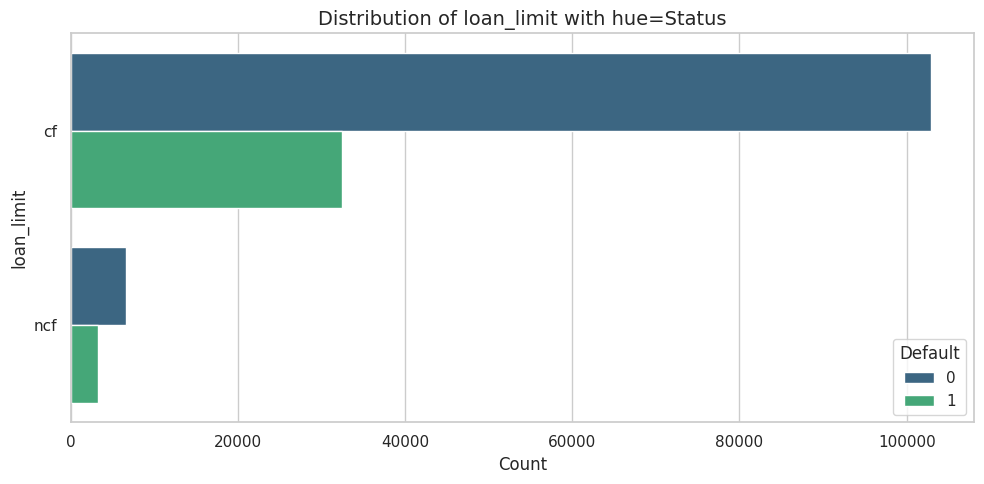

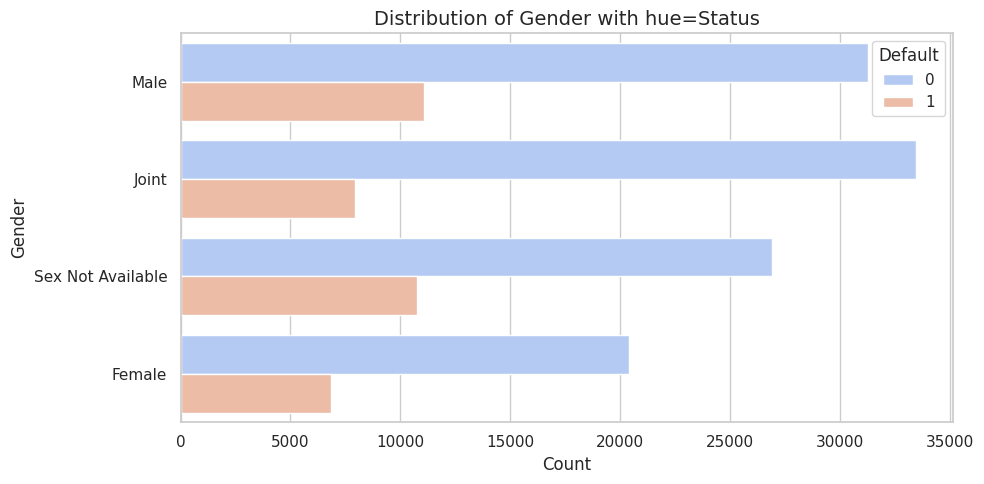

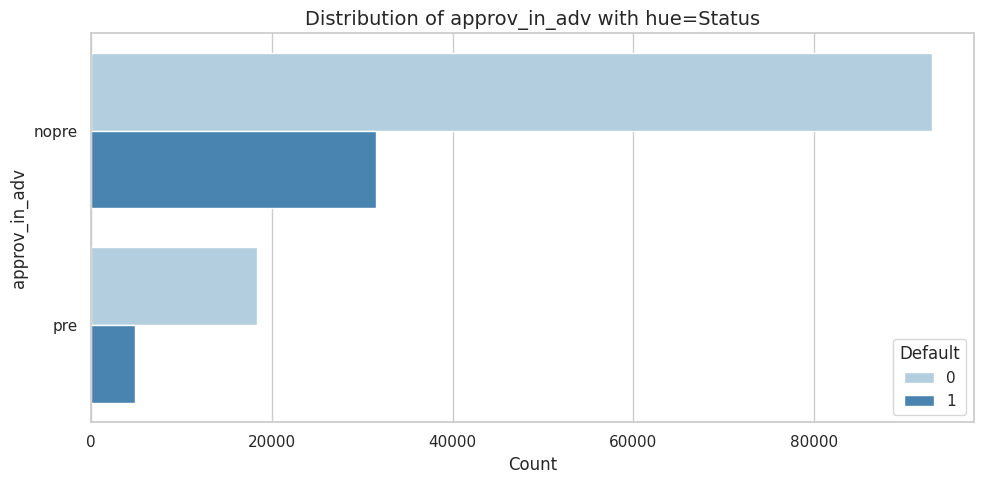

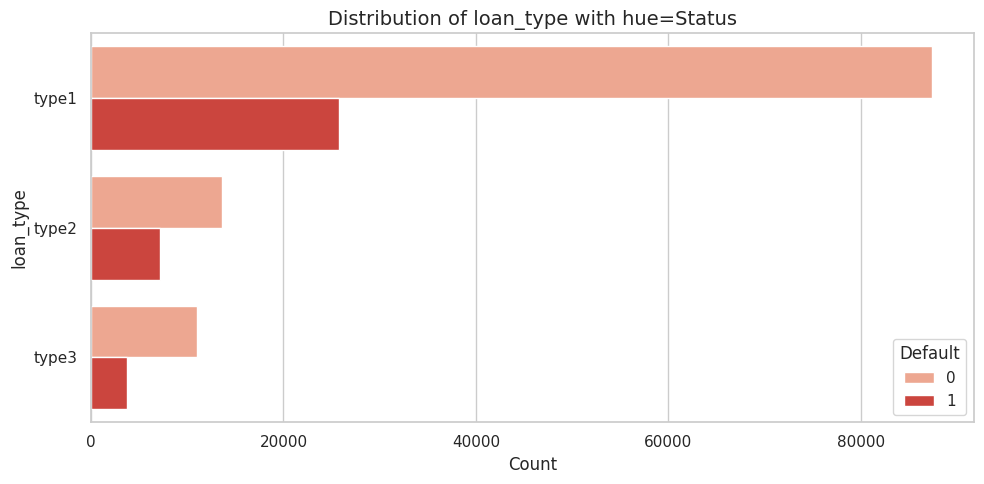

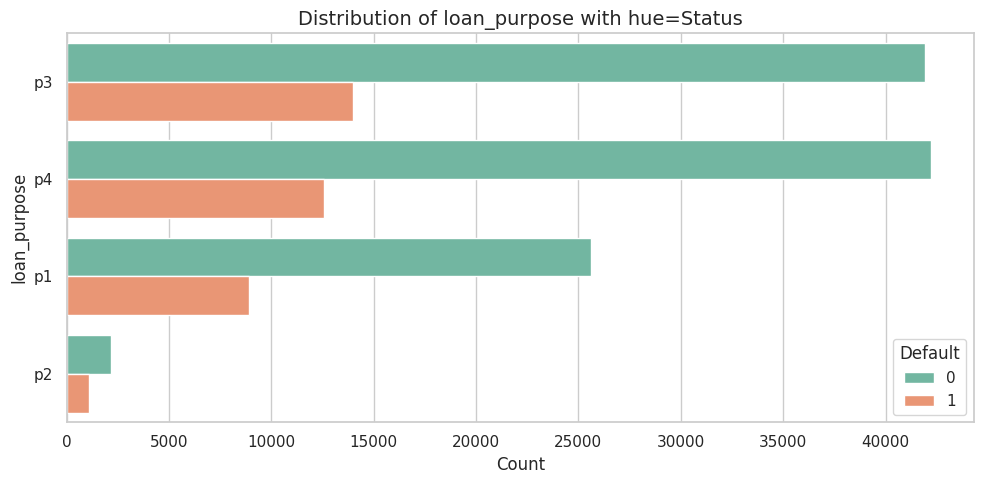

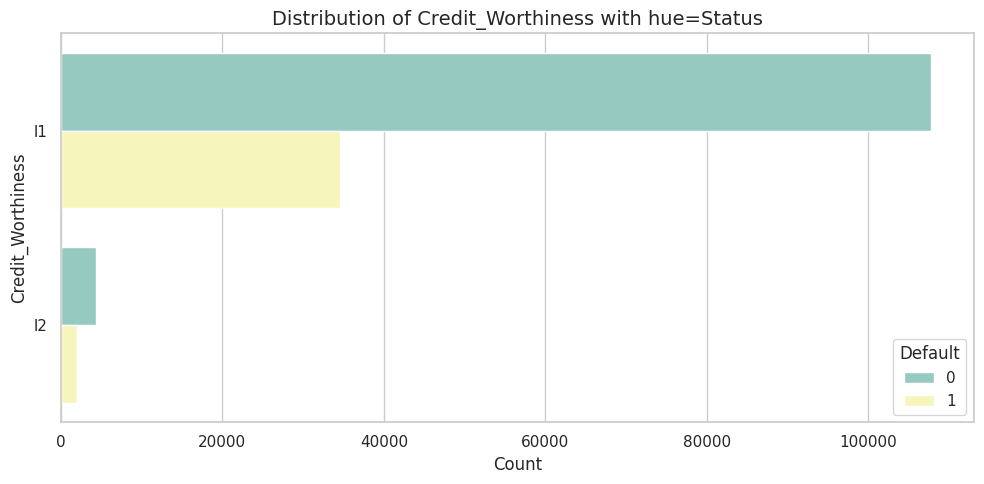

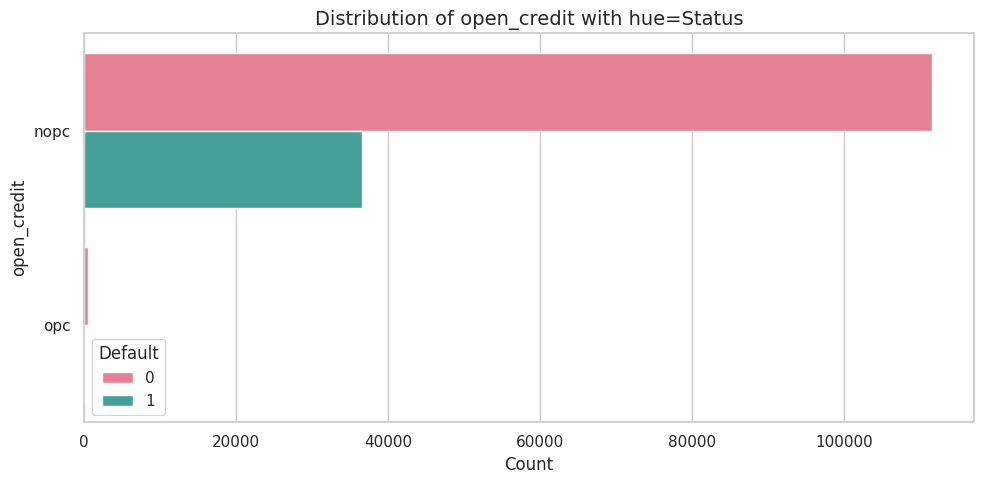

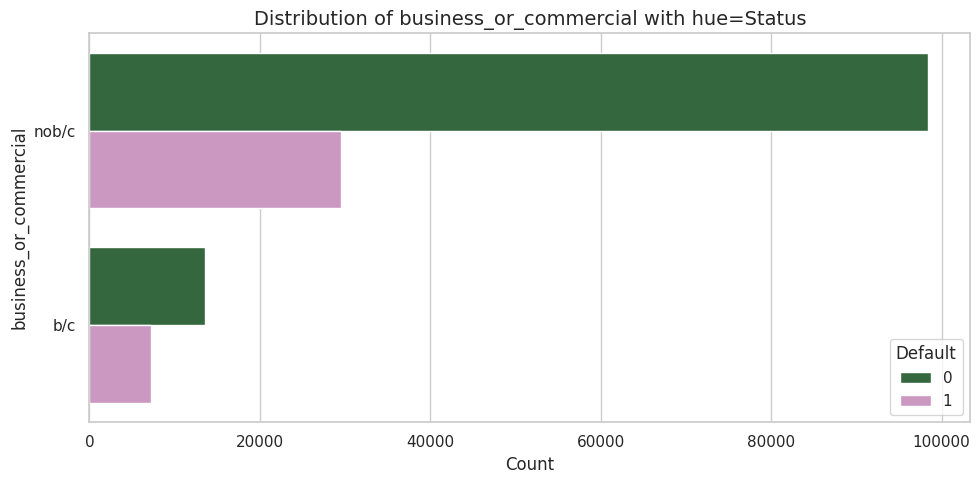

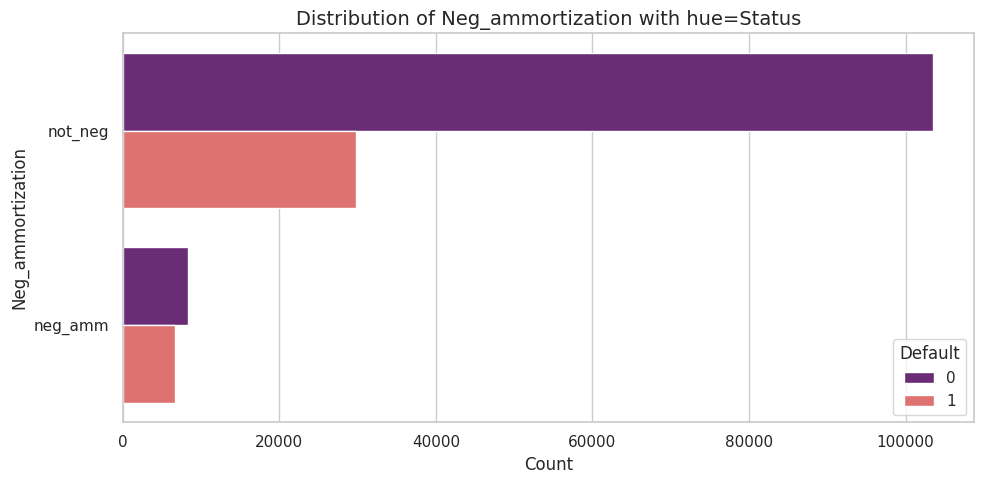

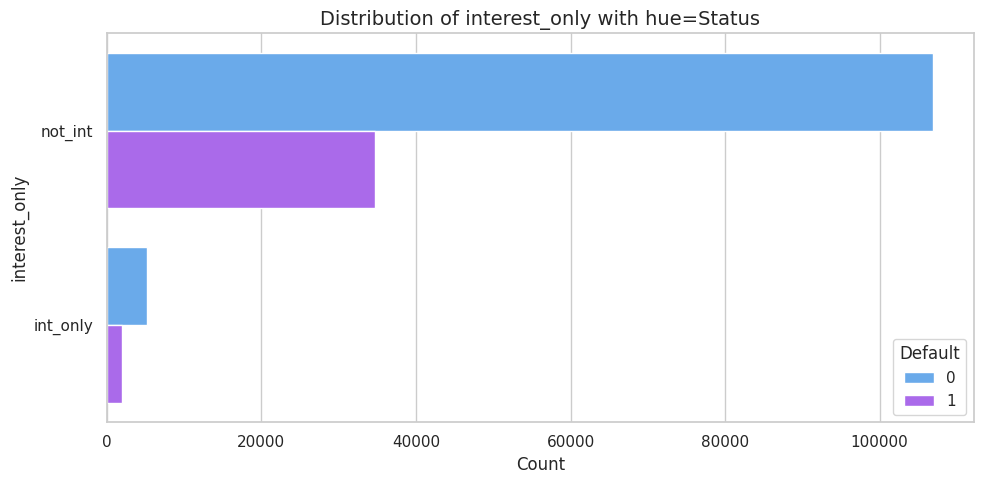

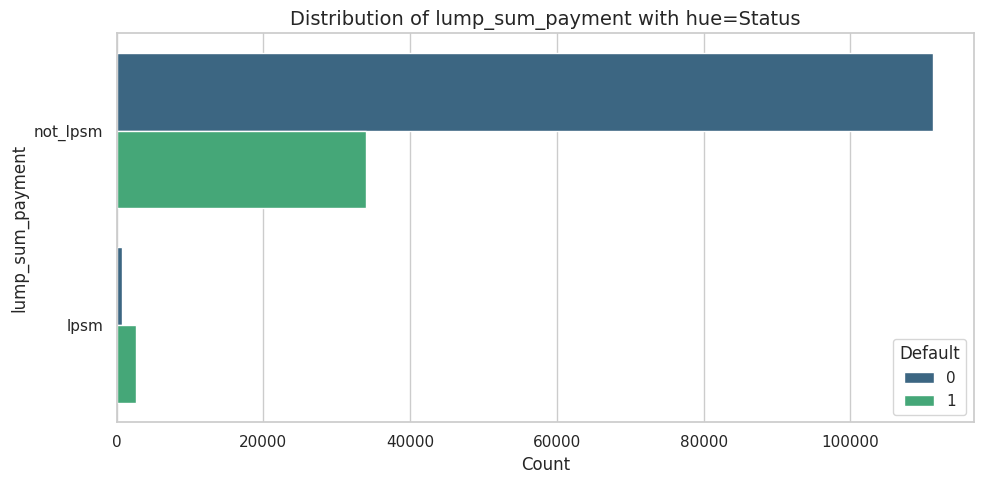

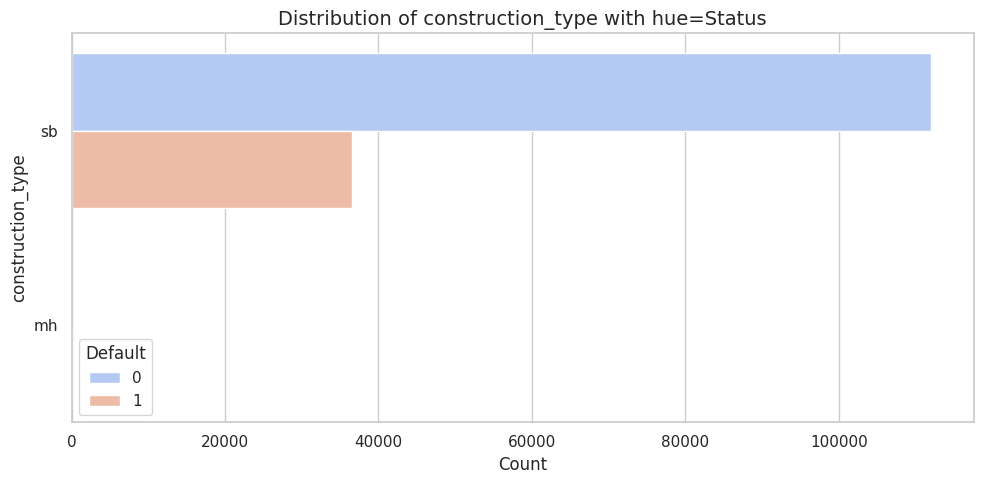

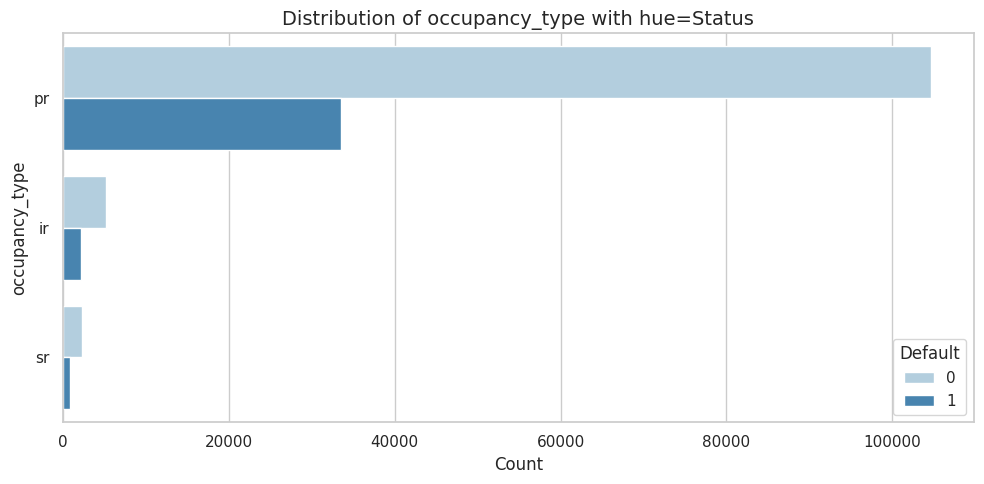

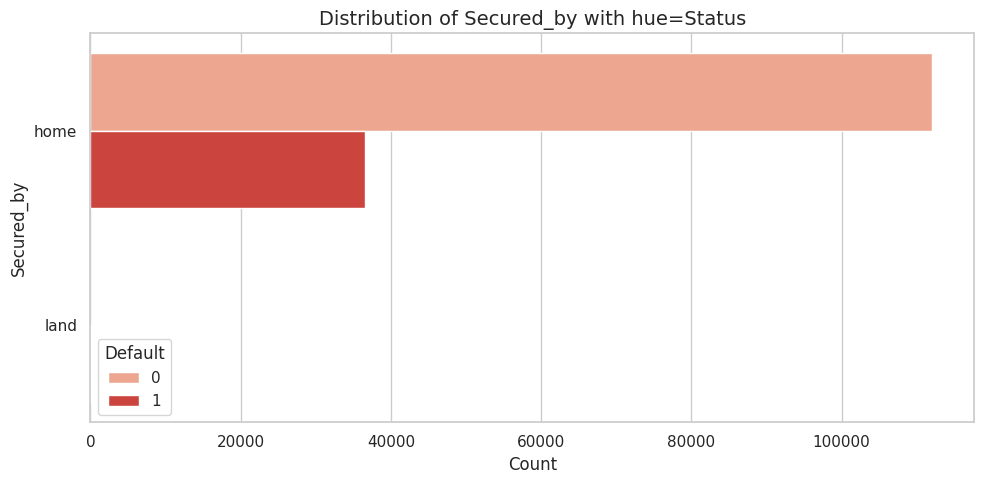

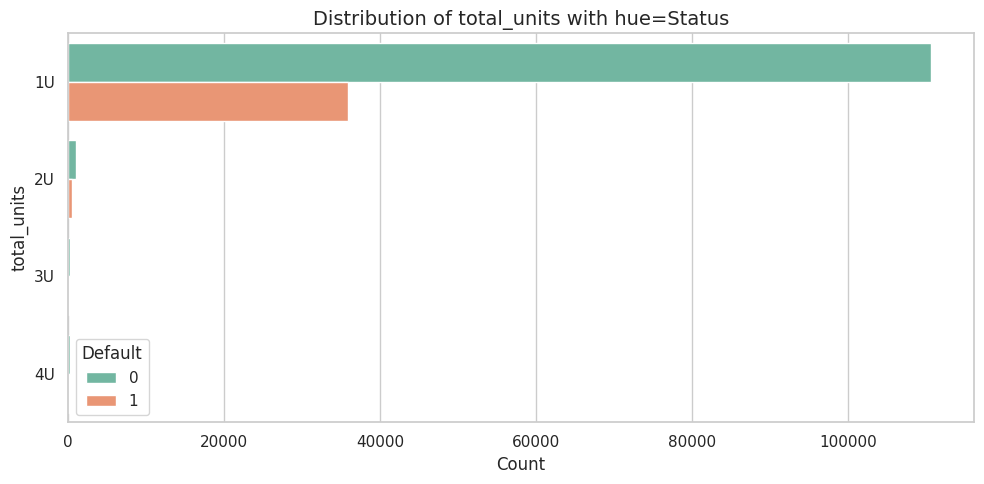

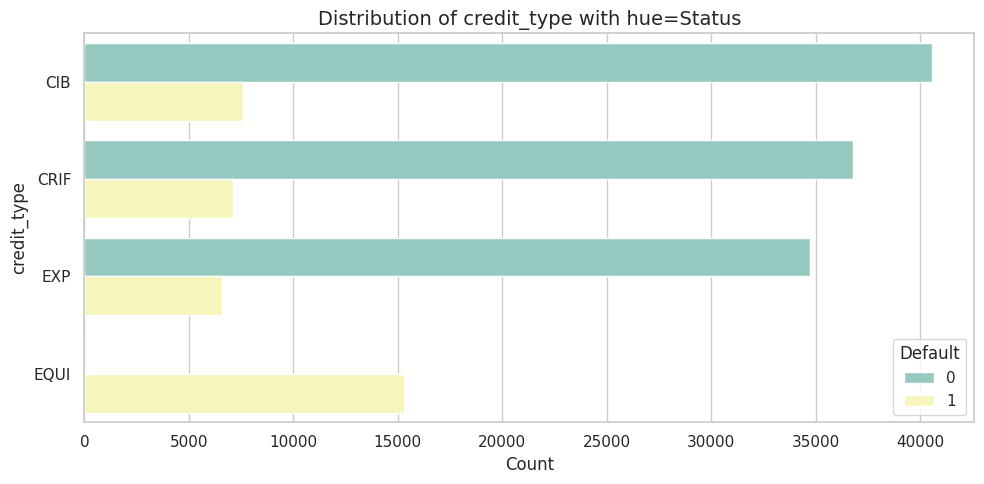

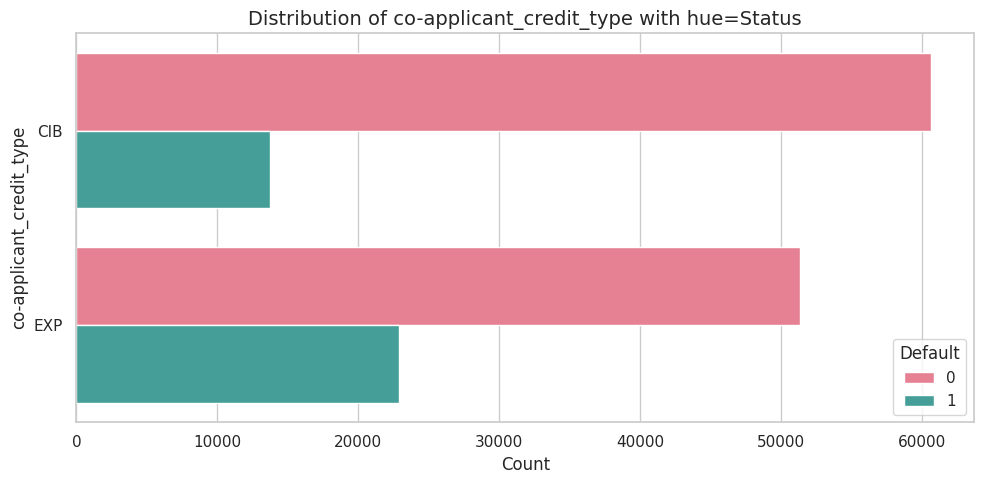

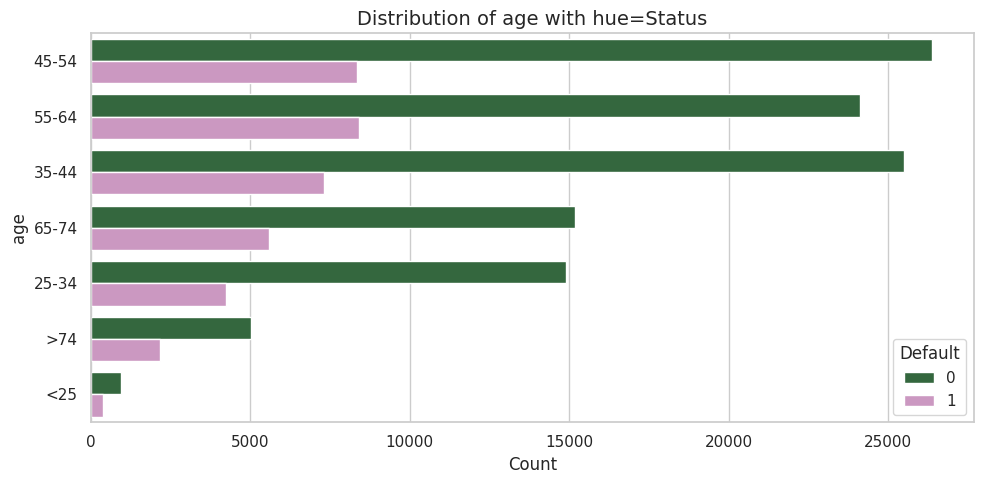

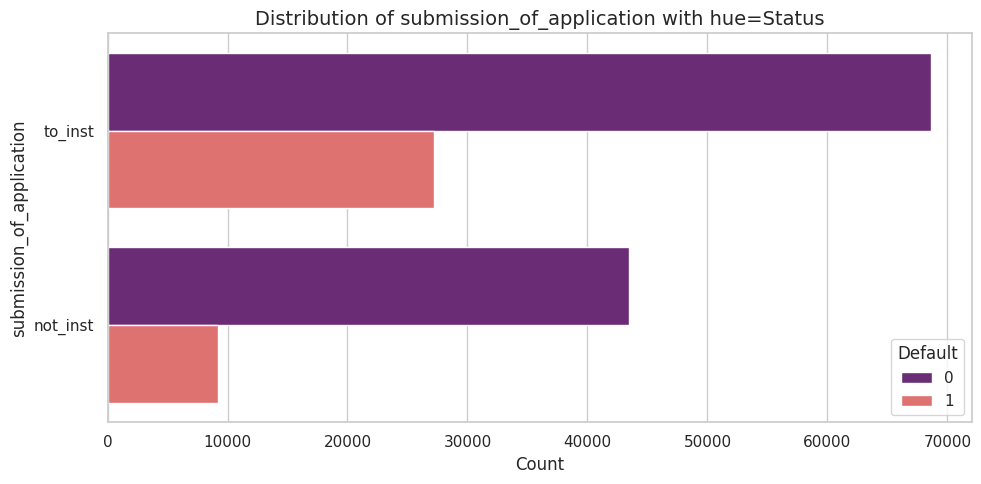

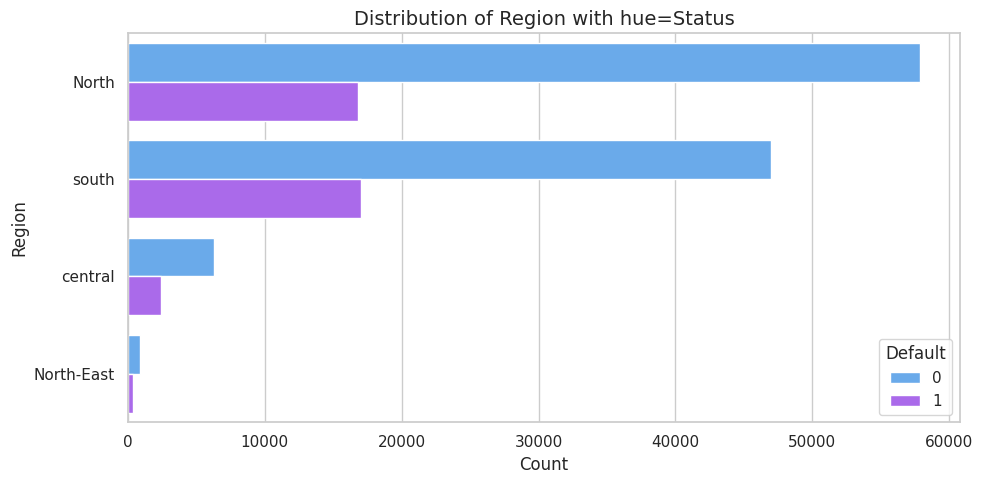

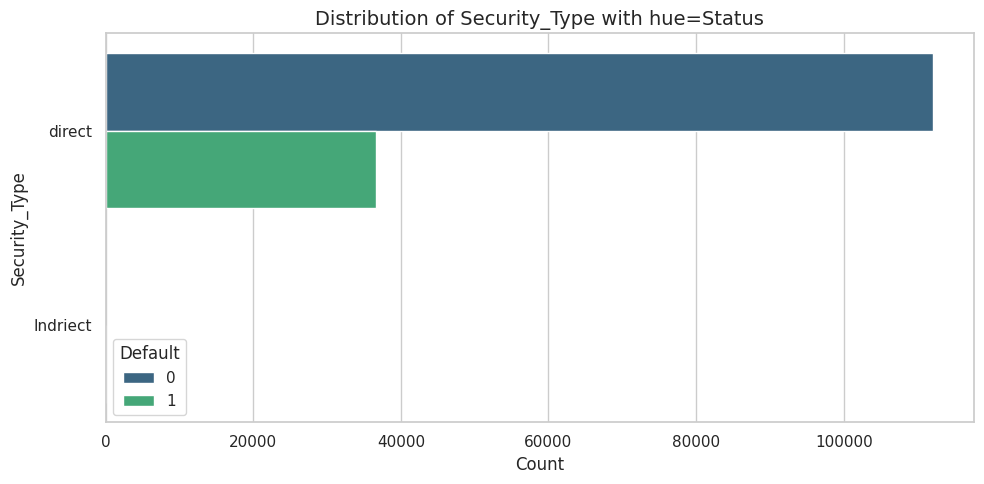

In [183]:
# List of categorical columns
categorical_columns = df_clean.select_dtypes(include=['object']).columns.tolist()

# Define a list of color palettes
palettes = [
    "viridis", "coolwarm", "Blues", "Reds", "Set2",
    "Set3", "husl", "cubehelix", "magma", "cool"
]

# Loop through categorical columns and create plots with different palettes
for i, col in enumerate(categorical_columns):
    palette = palettes[i % len(palettes)]  # Cycle through the palettes
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df[col], hue=df['Status'], order=df_clean[col].value_counts().index, palette=palette)
    plt.title(f'Distribution of {col} with hue=Status', fontsize=14)
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.legend(title='Default', labels=['0', '1'])
    plt.tight_layout()
    plt.show()

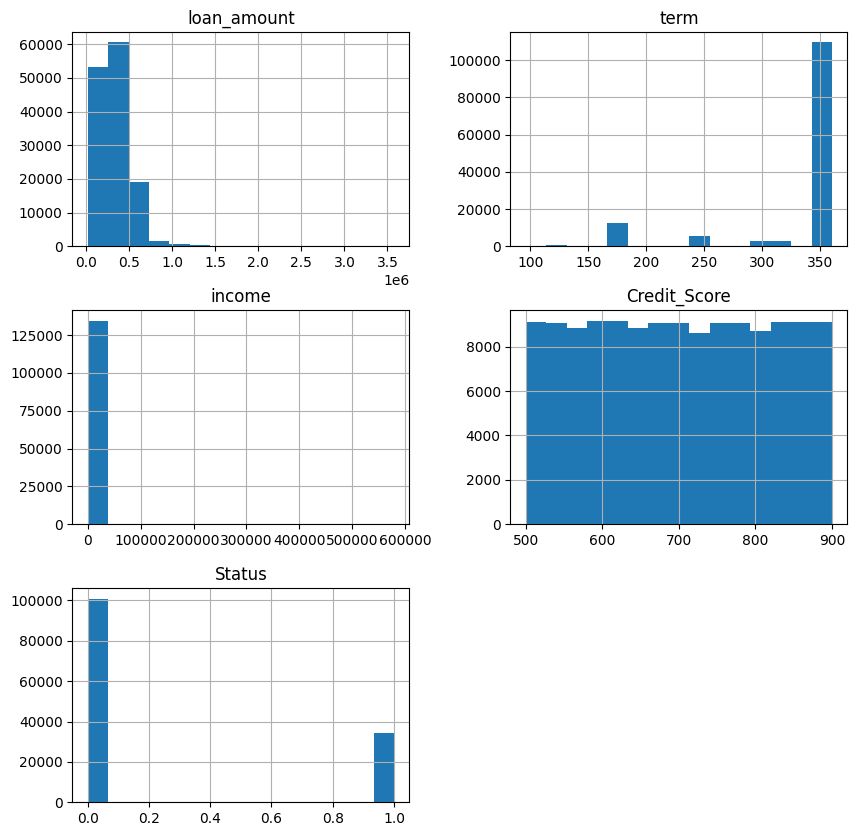

In [51]:
# check the distribution of numeric columns.
df_clean.hist(bins=15, figsize=(10,10))
plt.show()

In [83]:
# drop the columns with extreme distributions
df_clean = df_clean.drop(["Security_Type", "total_units", "construction_type", "open_credit", "Secured_by"], axis=1)
df_clean.shape

(135108, 21)

In [84]:
# Function to detect and remove outliers based on z-scores
def detect_outliers(data):
    threshold = 3
    for i in data.columns:
        if data[i].dtype == 'float64' or data[i].dtype == 'int64':
            mean = np.mean(data[i])
            std = np.std(data[i])

            # Check if the standard deviation is 0 to avoid division by zero
            if std != 0:
                z_scores = [(y - mean) / std for y in data[i]]
                data = data[np.abs(z_scores) <= threshold]
            else:
                # If std is 0, we can't calculate z-scores, so we skip the column
                print(f"Skipping column '{i}' due to zero standard deviation.")

    return data
df_clean = detect_outliers(df_clean)
df_clean.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,business_or_commercial,loan_amount,term,Neg_ammortization,...,lump_sum_payment,occupancy_type,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,Region,Status
0,cf,Sex Not Available,nopre,type1,p1,l1,nob/c,116500,360.0,not_neg,...,not_lpsm,pr,1740.0,EXP,758,CIB,25-34,to_inst,south,1
1,cf,Male,nopre,type2,p1,l1,b/c,206500,360.0,not_neg,...,lpsm,pr,4980.0,EQUI,552,EXP,55-64,to_inst,North,1
2,cf,Male,pre,type1,p1,l1,nob/c,406500,360.0,neg_amm,...,not_lpsm,pr,9480.0,EXP,834,CIB,35-44,to_inst,south,0
3,cf,Male,nopre,type1,p4,l1,nob/c,456500,360.0,not_neg,...,not_lpsm,pr,11880.0,EXP,587,CIB,45-54,not_inst,North,0
4,cf,Joint,pre,type1,p1,l1,nob/c,696500,360.0,not_neg,...,not_lpsm,pr,10440.0,CRIF,602,EXP,25-34,not_inst,North,0


In [85]:
# Target Encoding
#'status' is the target variable and other columns are categorical
dummy_list = list(df_clean.columns[df_clean.dtypes == "object"])
target_column = 'Status'

for i in dummy_list:
    # Calculate the mean of the target for each category in the categorical column
    mean_target = df_clean.groupby(i)[target_column].mean()

    # Map the mean target value to the original column
    df_clean[i] = df_clean[i].map(mean_target)

In [86]:
# check the information of the data again.
df_clean[df_clean["Status"] == 0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 98327 entries, 2 to 148669
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loan_limit                 98327 non-null  float64
 1   Gender                     98327 non-null  float64
 2   approv_in_adv              98327 non-null  float64
 3   loan_type                  98327 non-null  float64
 4   loan_purpose               98327 non-null  float64
 5   Credit_Worthiness          98327 non-null  float64
 6   business_or_commercial     98327 non-null  float64
 7   loan_amount                98327 non-null  int64  
 8   term                       98327 non-null  float64
 9   Neg_ammortization          98327 non-null  float64
 10  interest_only              98327 non-null  float64
 11  lump_sum_payment           98327 non-null  float64
 12  occupancy_type             98327 non-null  float64
 13  income                     98327 non-null  float64

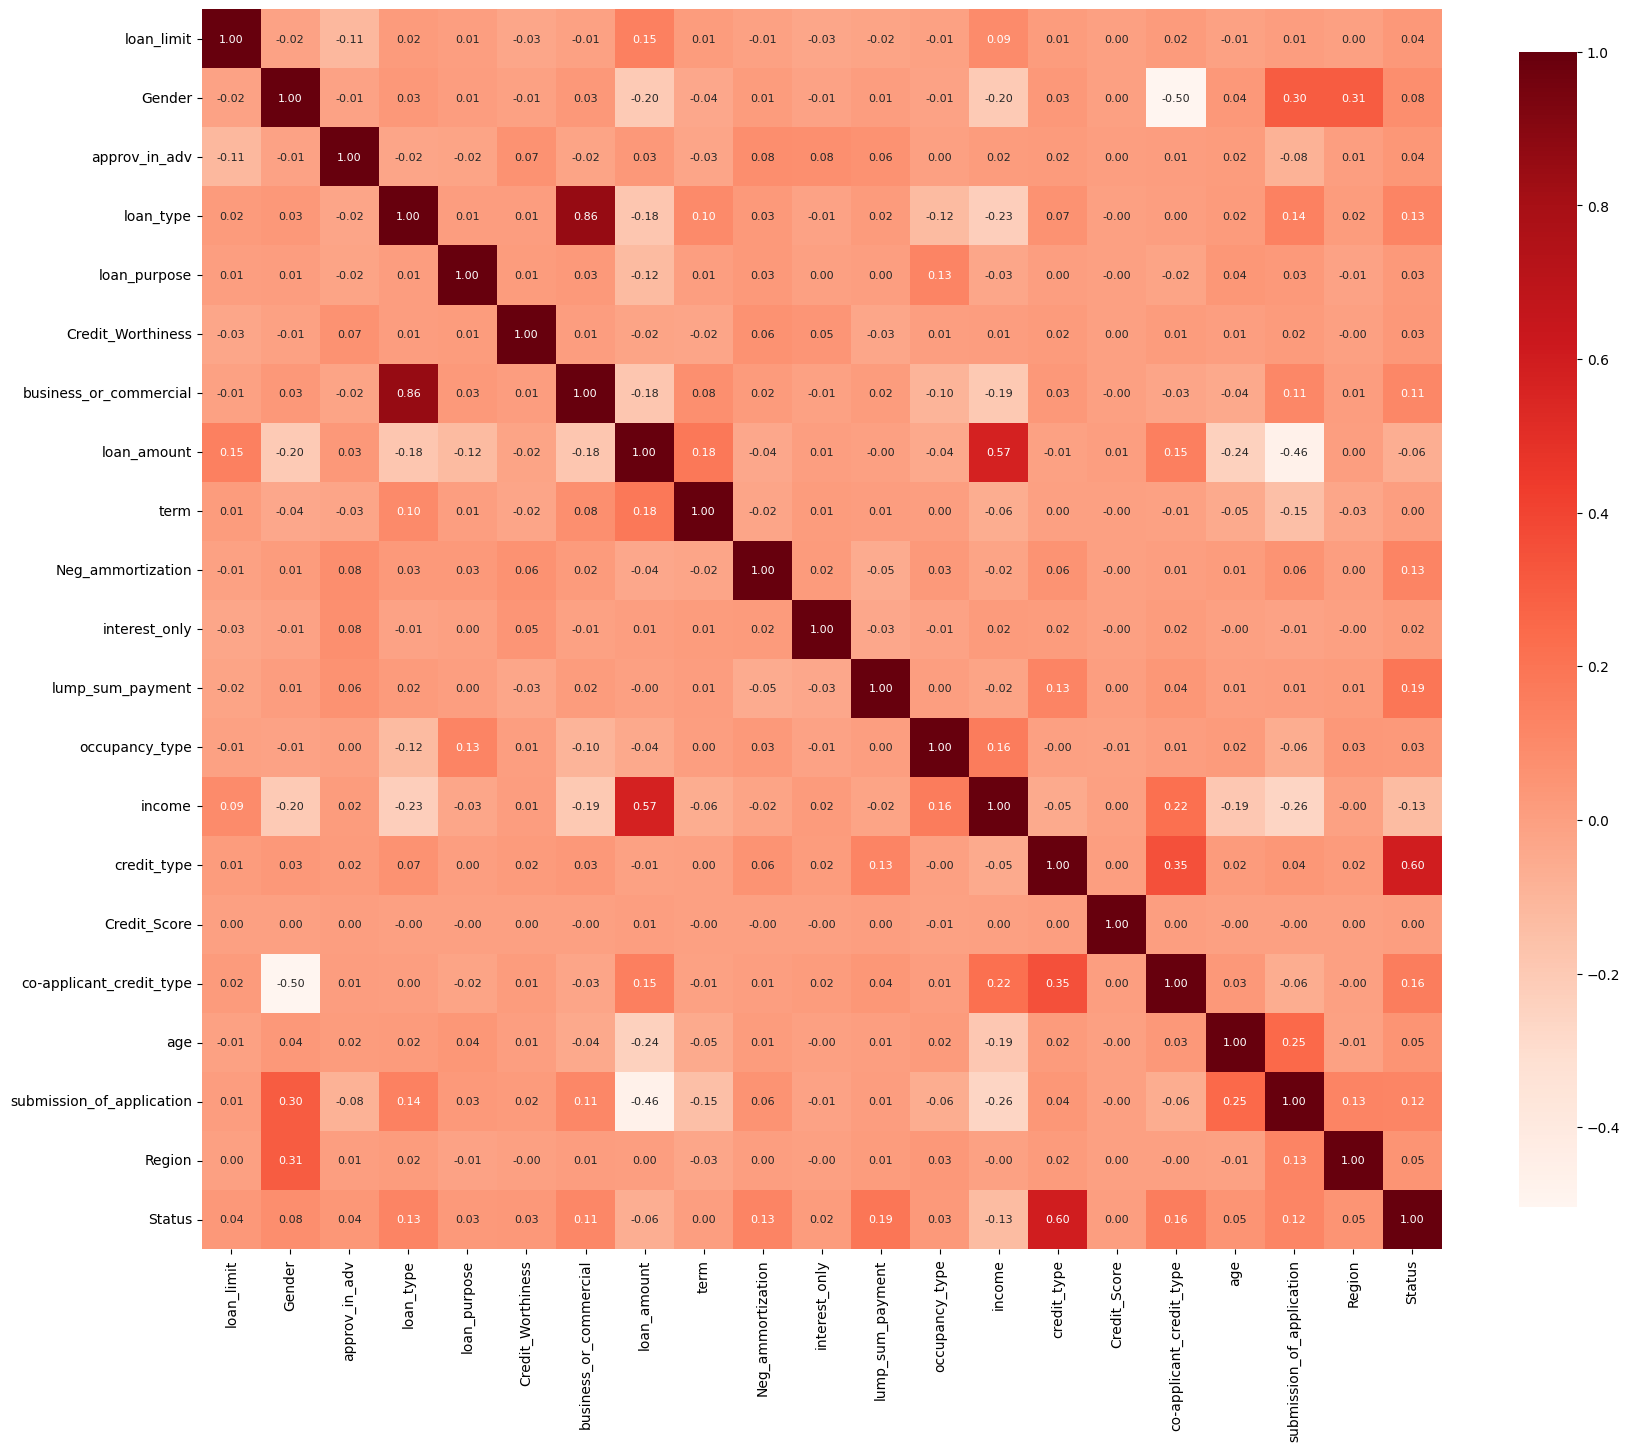

In [87]:
#Calculate the correlation matrix
corr = df_clean.corr()

# Adjust figure size to avoid overlapping labels
plt.figure(figsize=(20, 20))  # Larger figure size for better readability

# Create the heatmap
sns.heatmap(corr, annot=True, cmap='Reds', square=True, fmt=".2f",
            cbar_kws={'shrink': 0.75}, annot_kws={"size": 8})

# Rotate the tick labels for better visibility
plt.xticks(rotation=90)  # Rotate x-axis labels (columns)
plt.yticks(rotation=0)   # Rotate y-axis labels (rows)

# Show the plot
plt.show()

In [88]:
# Normalized value counts of y, rounded.
print(f'{df_clean.Status.value_counts(normalize=True).round(3)}')

Status
0    0.748
1    0.252
Name: proportion, dtype: float64


# Modeling

In [89]:
from sklearn.model_selection import train_test_split

# 'Status' is the target variable and the rest are features.
X = df_clean.select_dtypes(include=['int', 'float'])
X = X.drop(['Status'], axis=1) # Features (all columns except 'status')
y = df_clean['Status']  # Target (status)

# Split the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state=42)

In [90]:
import numpy as np
# Check for missing or infinite values
if np.any(np.isnan(X_train)) or np.any(np.isinf(X_train)):
    print("Cleaning data...")
    X_train = np.nan_to_num(X_train)  # Replace NaNs with 0
    X_test = np.nan_to_num(X_test)

In [91]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131413 entries, 0 to 148669
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 131413 non-null  float64
 1   Gender                     131413 non-null  float64
 2   approv_in_adv              131413 non-null  float64
 3   loan_type                  131413 non-null  float64
 4   loan_purpose               131413 non-null  float64
 5   Credit_Worthiness          131413 non-null  float64
 6   business_or_commercial     131413 non-null  float64
 7   loan_amount                131413 non-null  int64  
 8   term                       131413 non-null  float64
 9   Neg_ammortization          131413 non-null  float64
 10  interest_only              131413 non-null  float64
 11  lump_sum_payment           131413 non-null  float64
 12  occupancy_type             131413 non-null  float64
 13  income                     131413 

In [95]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import recall_score
from sklearn.svm import SVC

# Train a DummyClassifier
dummy_clf = DummyClassifier().fit(X_train, y_train)

# Get baseline accuracy and round to 3 decimal places
baseline_score = dummy_clf.score(X_test, y_test)
print(f"Baseline accuracy: {baseline_score:.3f}")

# Generate predictions for the test set
predictions = dummy_clf.predict(X_test)

# Print some predictions (for example, the first 10)
print("Predictions:", predictions[:10])

# Calculate recall for each class
recall_class_0 = recall_score(y_test, predictions, pos_label=0)
recall_class_1 = recall_score(y_test, predictions, pos_label=1)

# Print recall scores with 3 decimal places
print(f"Recall for class 0: {recall_class_0:.3f}")
print(f"Recall for class 1: {recall_class_1:.3f}")

Baseline accuracy: 0.749
Predictions: [0 0 0 0 0 0 0 0 0 0]
Recall for class 0: 1.000
Recall for class 1: 0.000


In [96]:
from sklearn.svm import SVC

# Create and fit the Support Vector Classifier (SVC)
svc = SVC()
svc.fit(X_train, y_train)

# Get predictions on the test set
predictions = svc.predict(X_test)

# Print the predictions
print("Predictions:", predictions)

# Calculate accuracy
accuracy = svc.score(X_test, y_test)
print("Accuracy:", accuracy)

# Calculate recall for each class
recall_class_0 = recall_score(y_test, predictions, pos_label=0)
recall_class_1 = recall_score(y_test, predictions, pos_label=1)

# Print recall scores
print(f"Recall for class 0: {recall_class_0:.3f}")
print(f"Recall for class 1: {recall_class_1:.3f}")

Predictions: [0 0 0 ... 0 0 0]
Accuracy: 0.7491122159090909
Recall for class 0: 1.000
Recall for class 1: 0.000


In [98]:
#Round accuracy to 3 decimal and print
print(f"SVC Accuracy: {accuracy:.3f}")


SVC Accuracy: 0.749


In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import time

lg_start_time = time.time()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

lg_end_time = time.time()
log_reg_train_preds = log_reg.predict(X_train_scaled)
log_reg_test_preds = log_reg.predict(X_test_scaled)

log_reg_train_accuracy = accuracy_score(y_train, log_reg_train_preds)
log_reg_train_precision = precision_score(y_train, log_reg_train_preds)
log_reg_train_recall = recall_score(y_train, log_reg_train_preds)
log_reg_train_f1 = f1_score(y_train, log_reg_train_preds)

log_reg_test_accuracy = accuracy_score(y_test, log_reg_test_preds)
log_reg_test_precision = precision_score(y_test, log_reg_test_preds)
log_reg_test_recall = recall_score(y_test, log_reg_test_preds)
log_reg_test_f1 = f1_score(y_test, log_reg_test_preds)

execution_time_lg = lg_start_time - lg_end_time

In [101]:
# Print execution time rounded to 2 decimal places
print(f"Total execution time: {execution_time_lg:.2f} seconds")

# Print accuracies rounded to 3 decimal places
print(f"Logistic Regression Train Accuracy: {log_reg_train_accuracy:.3f}")
print(f"Logistic Regression Test Accuracy: {log_reg_test_accuracy:.3f}")

# Print precision values rounded to 3 decimal places
print(f"Train Precision for Logistic Regression: {log_reg_train_precision:.3f}")
print(f"Test Precision for Logistic Regression: {log_reg_test_precision:.3f}")

# Print recall values rounded to 3 decimal places
print(f"Train Recall for Logistic Regression: {log_reg_train_recall:.3f}")
print(f"Test Recall for Logistic Regression: {log_reg_test_recall:.3f}")

# Print F1-scores rounded to 3 decimal places
print(f"Train F1-Score for Logistic Regression: {log_reg_train_f1:.3f}")
print(f"Test F1-Score for Logistic Regression: {log_reg_test_f1:.3f}")

# Classification report (no rounding needed here for the report itself)
print("\nClassification Report (Test Set):")
print(classification_report(y_test, log_reg_test_preds))

print("\nClassification Report (Train Set):")
print(classification_report(y_train, log_reg_train_preds))


Total execution time: -0.18 seconds
Logistic Regression Train Accuracy: 0.862
Logistic Regression Test Accuracy: 0.863
Train Precision for Logistic Regression: 0.942
Test Precision for Logistic Regression: 0.943
Train Recall for Logistic Regression: 0.484
Test Recall for Logistic Regression: 0.482
Train F1-Score for Logistic Regression: 0.639
Test F1-Score for Logistic Regression: 0.638

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.85      0.99      0.92     29533
           1       0.94      0.48      0.64      9891

    accuracy                           0.86     39424
   macro avg       0.90      0.74      0.78     39424
weighted avg       0.87      0.86      0.85     39424


Classification Report (Train Set):
              precision    recall  f1-score   support

           0       0.85      0.99      0.91     68794
           1       0.94      0.48      0.64     23195

    accuracy                           0.86     

In [102]:
# Run models with Default Parameters

import time
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# Import display for better visualization in notebooks
from IPython.display import display

# Models dictionary
models = {
    'DecisionTree': {
        'model': DecisionTreeClassifier(random_state=42)
    },
    'KNeighbors': {
        'model': KNeighborsClassifier()
    },
    'SVM': {
        'model': SVC(probability=True, random_state=42)
    },
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42)
    }
}

# DataFrame to store results
results = []

# Loop through each model
for model_name, model_info in models.items():
    model = model_info['model']

    # Record training time
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Probabilities for ROC-AUC (if supported)
    if hasattr(model, "predict_proba"):
        y_train_proba = model.predict_proba(X_train)[:, 1]
        y_test_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_train_proba = None
        y_test_proba = None

    # Metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_recall = recall_score(y_train, y_train_pred, average="weighted")
    test_recall = recall_score(y_test, y_test_pred, average="weighted")

    if y_train_proba is not None and y_test_proba is not None:
        train_roc_auc = roc_auc_score(y_train, y_train_proba, multi_class="ovr", average="weighted")
        test_roc_auc = roc_auc_score(y_test, y_test_proba, multi_class="ovr", average="weighted")
    else:
        train_roc_auc = None
        test_roc_auc = None

    # Append results to the DataFrame
    results.append({
        "Model": model_name,
        "Train Time (s)": train_time,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Train Recall": train_recall,
        "Test Recall": test_recall,
        "Train ROC-AUC": train_roc_auc,
        "Test ROC-AUC": test_roc_auc
    })

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)

# Round the numerical columns to 3 decimal places
results_df = results_df.round(3)

# Display the heading and results DataFrame
print("Model Performance Comparison with Default Parameters (Rounded to 3 Decimal Places):")
display(results_df)


Model Performance Comparison with Default Parameters (Rounded to 3 Decimal Places):


,Model,Train Time (s),Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train ROC-AUC,Test ROC-AUC
0,DecisionTree,0.755,1.000,0.787,1.000,0.787,1.000,0.730
1,KNeighbors,0.019,0.791,0.723,0.791,0.723,0.808,0.558
2,SVM,3053.673,0.748,0.749,0.748,0.749,0.530,0.531
3,RandomForest,14.341,1.000,0.870,1.000,0.870,1.000,0.844


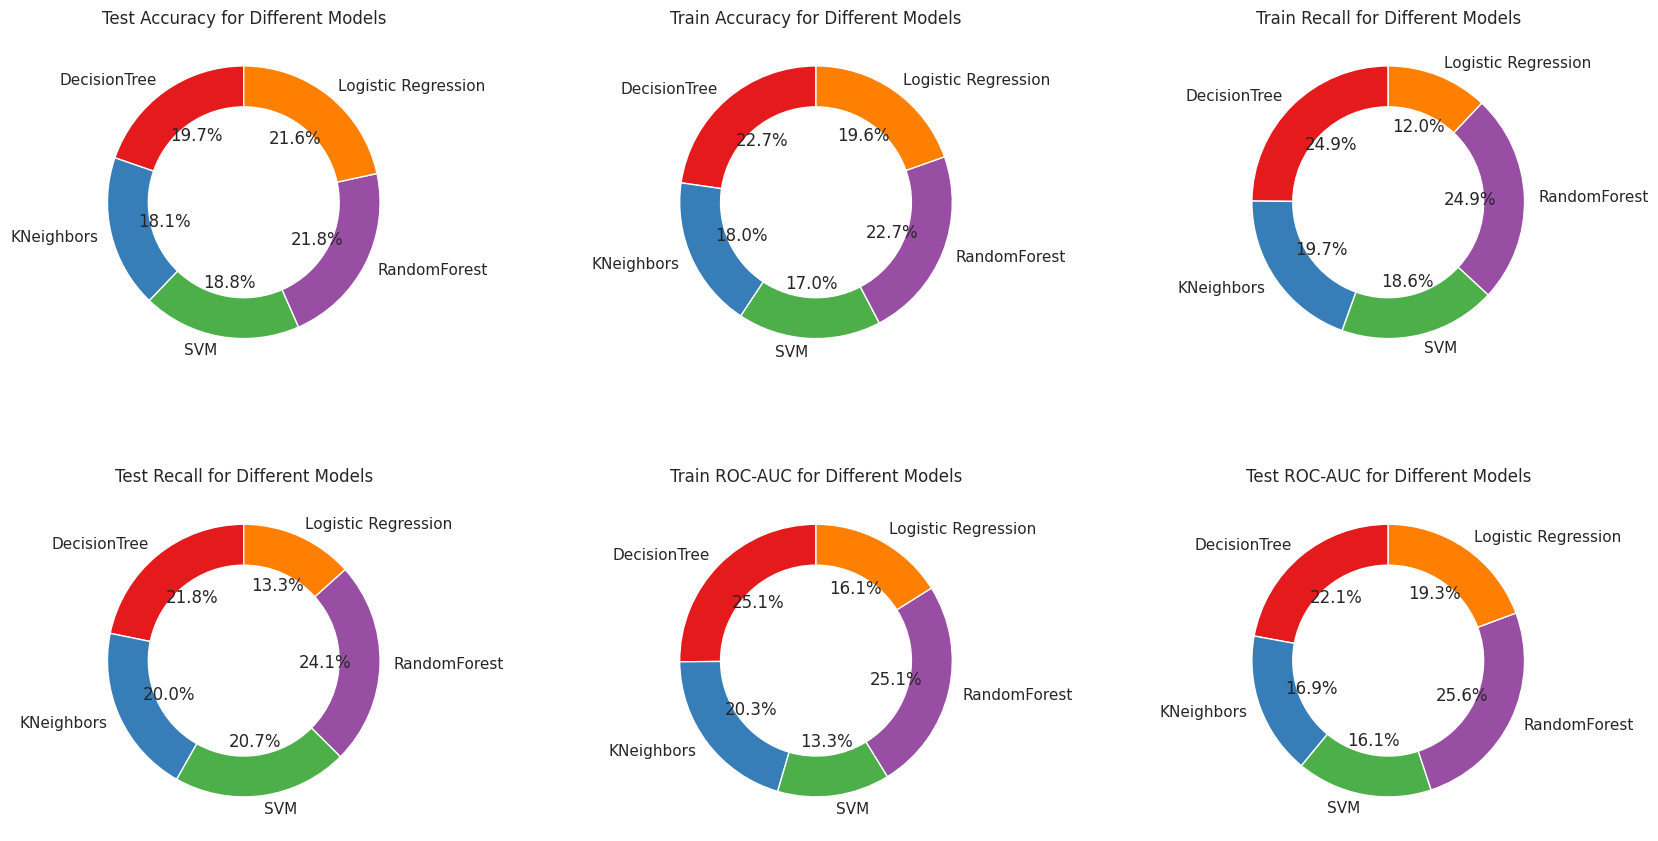

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for the DataFrame, including Logistic Regression
data = {
    "Model": ["DecisionTree", "KNeighbors", "SVM", "RandomForest", "Logistic Regression"],
    "Train Time (s)": [0.755, 0.019, 3053.673, 14.341, -0.18],
    "Train Accuracy": [1.000, 0.791, 0.748, 1.000, 0.862],
    "Test Accuracy": [0.787, 0.723, 0.749, 0.870, 0.863],
    "Train Recall": [1.000, 0.791, 0.748, 1.000, 0.484],
    "Test Recall": [0.787, 0.723, 0.749, 0.870, 0.482],
    "Train ROC-AUC": [1.000, 0.808, 0.530, 1.000, 0.639],
    "Test ROC-AUC": [0.730, 0.558, 0.531, 0.844, 0.638]
}

df_plot = pd.DataFrame(data)

# Adjust the custom_colors palette to match the number of unique models
unique_models = df_plot['Model'].nunique()  # Get the number of unique models
custom_colors = sns.color_palette("Set1", unique_models)  # Generate a color palette with the correct number of colors

# Create subplots for each metric (use pie charts instead of bar charts)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.tight_layout(pad=5.0)

# List of metrics to plot
metrics = ["Test Accuracy", "Train Accuracy", "Train Recall", "Test Recall", "Train ROC-AUC", "Test ROC-AUC"]

# Loop through each metric and plot a pie chart
for i, metric in enumerate(metrics):
    ax = axes[i // 3, i % 3]  # Determine the correct axis for the plot

    # Get the metric values for each model
    metric_values = df_plot[["Model", metric]]

    # Plot a pie chart for the metric values
    ax.pie(
        metric_values[metric],  # Values for the pie chart
        labels=metric_values["Model"],  # Labels are the model names
        autopct='%1.1f%%',  # Show percentages
        colors=custom_colors,  # Custom colors for each model
        startangle=90,  # Start angle for the pie chart
        wedgeprops={'width': 0.3}  # Adjust the wedge width to make the pie smaller
    )
    ax.set_title(f'{metric} for Different Models')

# Display the pie charts
plt.show()


# **Model Analysis with default parameters**

**1. RandomForest**:

Best test accuracy (0.870) and test recall (0.870).

Strong test ROC-AUC (0.844), indicating solid generalization to unseen data.

Exhibits perfect train accuracy (1.000) and train recall (1.000), which may indicate slight overfitting but still performs well on the test set.

**2. Logistic Regression**:

Test accuracy is 0.863, which is decent but lower than RandomForest.

Test recall and train recall (0.484 and 0.639, respectively) are comparatively low, suggesting it might not be identifying positive cases effectively.

Moderate train ROC-AUC (0.639), indicating room for improvement, especially in model regularization or class balancing.

**3. DecisionTree**:

Perfect train accuracy (1.000) and train recall (1.000), but relatively lower test accuracy (0.787) and test recall (0.787).

This suggests overfitting—it fits the training data perfectly but struggles to generalize to the test set.

**4. KNeighbors**:

Lower test accuracy (0.723) and test ROC-AUC (0.558), suggesting suboptimal performance with default settings.

Train recall (0.791) is reasonable, but it struggles to maintain performance on the test set.

**5. SVM**:

Very low train ROC-AUC (0.530) and test ROC-AUC (0.531), indicating poor separation of classes in both training and test data.

Test accuracy (0.749) is relatively moderate, but it doesn’t perform as well as the other models in terms of distinguishing between classes.

**Recommendations**:
RandomForest is the strongest performer overall.

Logistic Regression, KNeighbors, and SVM could benefit from tuning hyperparameters for better performance.

DecisionTree may need pruning or cross-validation to reduce overfitting.

# Improve models(hyperparameter tuning)

In [109]:
import warnings
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import time
from IPython.display import display

# Define the Logistic Regression model
logistic_regression_model = LogisticRegression(random_state=42, max_iter=1000)

# Define the hyperparameter grid for tuning
param_grid = {
    'C': [0.1, 1.0, 10],            # Regularization strength
    'solver': ['lbfgs', 'liblinear'],  # Solvers compatible with binary classification
    'penalty': ['l2'],                # L2 regularization
    'class_weight': [None, 'balanced']  # Handle class imbalance
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=logistic_regression_model,
    param_grid=param_grid,
    scoring='roc_auc',  # Use ROC-AUC for binary classification
    cv=3,               # 3-fold cross-validation
    n_jobs=-1,          # Use all available CPU cores
    verbose=0           # No detailed logs for a clean output
)

# Record the start time
start_time = time.time()

# Fit the model using GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model on the test set
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)
y_train_proba = best_model.predict_proba(X_train_scaled)[:, 1]  # Probability for the positive class
y_test_proba = best_model.predict_proba(X_test_scaled)[:, 1]  # Probability for the positive class

# Calculate test metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_proba)

# Calculate train metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_proba)

# Calculate the total time taken for training
total_time = time.time() - start_time

# Display the results
display(f"Logistic Regression Results (Binary Classification):")
display(f"Best Parameters: {best_params}")
display(f"Total Time (s): {total_time:.3f}")
display(f"Train Accuracy: {train_accuracy:.3f}")
display(f"Train Precision: {train_precision:.3f}")
display(f"Train Recall: {train_recall:.3f}")
display(f"Train ROC-AUC: {train_roc_auc:.3f}")
display(f"Test Accuracy: {test_accuracy:.3f}")
display(f"Test Precision: {test_precision:.3f}")
display(f"Test Recall: {test_recall:.3f}")
display(f"Test ROC-AUC: {test_roc_auc:.3f}")

'Logistic Regression Results (Binary Classification):'

"Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}"

'Total Time (s): 3.933'

'Train Accuracy: 0.823'

'Train Precision: 0.651'

'Train Recall: 0.638'

'Train ROC-AUC: 0.837'

'Test Accuracy: 0.824'

'Test Precision: 0.653'

'Test Recall: 0.639'

'Test ROC-AUC: 0.834'

In [145]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import time
import pandas as pd
from IPython.display import display

# Reduce parameter grid to make search more efficient
models = {
    'DecisionTree': {
        'model': DecisionTreeClassifier(random_state=42),
        'param_grid': {
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'criterion': ['gini']
        }
    },
    'KNeighbors': {
        'model': KNeighborsClassifier(),
        'param_grid': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform'],
            'metric': ['euclidean']
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'param_grid': {
            'n_estimators': [50, 100],
            'max_depth': [None, 10],
            'min_samples_split': [2, 5]
        }
    }
}

# Results storage
results = []

# Loop through models and apply grid search with reduced cv and n_iter
for model_name, model_info in models.items():
    model = model_info['model']
    param_grid = model_info['param_grid']

    # GridSearch with reduced cv and fewer iterations for testing purposes
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1, scoring='accuracy')
    # Alternatively, use RandomizedSearchCV for larger parameter space:
    # randomized_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=5, cv=3, n_jobs=-1, verbose=1, scoring='accuracy')

    # Training with time tracking
    start_time = time.time()
    grid_search.fit(X_train, y_train)  # Or randomized_search.fit(X_train, y_train)
    train_time = time.time() - start_time

    best_model = grid_search.best_estimator_

    # Predictions
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    # ROC-AUC if supported
    if hasattr(best_model, "predict_proba"):
        y_train_proba = best_model.predict_proba(X_train)[:, 1]
        y_test_proba = best_model.predict_proba(X_test)[:, 1]
    else:
        y_train_proba = None
        y_test_proba = None

    # Metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_recall = recall_score(y_train, y_train_pred, average="weighted")
    test_recall = recall_score(y_test, y_test_pred, average="weighted")

    if y_train_proba is not None and y_test_proba is not None:
        train_roc_auc = roc_auc_score(y_train, y_train_proba, multi_class="ovr", average="weighted")
        test_roc_auc = roc_auc_score(y_test, y_test_proba, multi_class="ovr", average="weighted")
    else:
        train_roc_auc = None
        test_roc_auc = None

    # Record results with rounded values
    results.append({
        "Model": model_name,
        "Best Parameters": grid_search.best_params_,
        "Train Time (s)": round(train_time, 3),
        "Train Accuracy": round(train_accuracy, 3),
        "Test Accuracy": round(test_accuracy, 3),
        "Train Recall": round(train_recall, 3),
        "Test Recall": round(test_recall, 3),
        "Train ROC-AUC": round(train_roc_auc, 3) if train_roc_auc is not None else None,
        "Test ROC-AUC": round(test_roc_auc, 3) if test_roc_auc is not None else None
    })

# Create a DataFrame for results
results_df = pd.DataFrame(results)

# Display the results
display(results_df)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 8 candidates, totalling 24 fits


,Model,Best Parameters,Train Time (s),Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train ROC-AUC,Test ROC-AUC
0,DecisionTree,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",4.234,0.876,0.870,0.876,0.870,0.850,0.841
1,KNeighbors,"{'metric': 'euclidean', 'n_neighbors': 7, 'wei...",35.697,0.779,0.735,0.779,0.735,0.772,0.560
2,RandomForest,"{'max_depth': None, 'min_samples_split': 5, 'n...",38.843,0.955,0.870,0.955,0.870,1.000,0.848


In [117]:
import xgboost as xgb

# Define the XGBoost model with default parameters
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',  # For binary classification
    eval_metric='logloss'        # Evaluation metric
)

# Record the training time
start_time = time.time()

# Fit the model to the training data (X_train, y_train should be defined)
xgb_model.fit(X_train, y_train)

# Record the time taken for training
train_time = time.time() - start_time

# Make predictions on the train and test sets
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Probabilities for ROC-AUC (if supported)
y_train_proba = xgb_model.predict_proba(X_train)[:, 1]
y_test_proba = xgb_model.predict_proba(X_test)[:, 1]

# Metrics for evaluation
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred, average="weighted")
test_recall = recall_score(y_test, y_test_pred, average="weighted")
train_roc_auc = roc_auc_score(y_train, y_train_proba)
test_roc_auc = roc_auc_score(y_test, y_test_proba)

# Display the results rounded to 3 decimals
display(f"Training Time: {round(train_time, 3)} seconds")
display(f"Training Accuracy: {round(train_accuracy, 3)}")
display(f"Test Accuracy: {round(test_accuracy, 3)}")
display(f"Training Recall: {round(train_recall, 3)}")
display(f"Test Recall: {round(test_recall, 3)}")
display(f"Training ROC-AUC: {round(train_roc_auc, 3)}")
display(f"Test ROC-AUC: {round(test_roc_auc, 3)}")

'Training Time: 1.194 seconds'

'Training Accuracy: 0.887'

'Test Accuracy: 0.873'

'Training Recall: 0.887'

'Test Recall: 0.873'

'Training ROC-AUC: 0.903'

'Test ROC-AUC: 0.856'

In [118]:
# XGBoost model with hyperparameters

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Set up the grid search with cross-validation
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',  # Or use 'roc_auc' for ROC AUC score as evaluation metric
    cv=3,  # 3-fold cross-validation
    verbose=1,
    n_jobs=-1  # Use all available cores
)

# Record the training time
start_time = time.time()

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Record the time taken for training
train_time = time.time() - start_time

# Display the best hyperparameters
display(f"Best Hyperparameters: {grid_search.best_params_}")

# Get the best model from the grid search
best_xgb_model = grid_search.best_estimator_

# Make predictions on the train and test sets
y_train_pred = best_xgb_model.predict(X_train)
y_test_pred = best_xgb_model.predict(X_test)

# Probabilities for ROC-AUC (if supported)
y_train_proba = best_xgb_model.predict_proba(X_train)[:, 1]
y_test_proba = best_xgb_model.predict_proba(X_test)[:, 1]

# Metrics for evaluation
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred, average="weighted")
test_recall = recall_score(y_test, y_test_pred, average="weighted")
train_roc_auc = roc_auc_score(y_train, y_train_proba)
test_roc_auc = roc_auc_score(y_test, y_test_proba)

# Display the results rounded to 3 decimals
display(f"Training Time: {round(train_time, 3)} seconds")
display(f"Training Accuracy: {round(train_accuracy, 3)}")
display(f"Test Accuracy: {round(test_accuracy, 3)}")
display(f"Training Recall: {round(train_recall, 3)}")
display(f"Test Recall: {round(test_recall, 3)}")
display(f"Training ROC-AUC: {round(train_roc_auc, 3)}")
display(f"Test ROC-AUC: {round(test_roc_auc, 3)}")

Fitting 3 folds for each of 729 candidates, totalling 2187 fits


"Best Hyperparameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}"

'Training Time: 601.726 seconds'

'Training Accuracy: 0.88'

'Test Accuracy: 0.874'

'Training Recall: 0.88'

'Test Recall: 0.874'

'Training ROC-AUC: 0.881'

'Test ROC-AUC: 0.861'

In [147]:
# Existing data for the DataFrame
data = {
    "Model": ["DecisionTree", "KNeighbors", "RandomForest", "Logistic Regression", "XGBoost"],
    "Best Parameters": [
        "{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}",
        "{'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}",
        "{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}",
        "{'C': 1.0, 'solver': 'lbfgs', 'penalty': 'l2', 'class_weight': 'balanced'}",
        "{'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}"
    ],
    "Train Time (s)": [4.234, 35.697, 38.843, 3.933, 601.726],
    "Train Accuracy": [0.876, 0.779, 0.955, 0.823, 0.88],
    "Test Accuracy": [0.870, 0.735, 0.870, 0.824, 0.874],
    "Train Recall": [0.876, 0.779, 0.955, 0.638, 0.88],
    "Test Recall": [0.870, 0.735, 0.870, 0.639, 0.874],
    "Train ROC-AUC": [0.850, 0.772, 1.000, 0.837, 0.881],
    "Test ROC-AUC": [0.841, 0.560, 0.848, 0.834, 0.861]
}

# Create the updated DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


                 Model                                    Best Parameters  \
0         DecisionTree  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
1           KNeighbors  {'metric': 'euclidean', 'n_neighbors': 7, 'wei...   
2         RandomForest  {'max_depth': None, 'min_samples_split': 5, 'n...   
3  Logistic Regression  {'C': 1.0, 'solver': 'lbfgs', 'penalty': 'l2',...   
4              XGBoost  {'colsample_bytree': 1.0, 'gamma': 0.1, 'learn...   

   Train Time (s)  Train Accuracy  Test Accuracy  Train Recall  Test Recall  \
0           4.234           0.876          0.870         0.876        0.870   
1          35.697           0.779          0.735         0.779        0.735   
2          38.843           0.955          0.870         0.955        0.870   
3           3.933           0.823          0.824         0.638        0.639   
4         601.726           0.880          0.874         0.880        0.874   

   Train ROC-AUC  Test ROC-AUC  
0          0.850         0.84

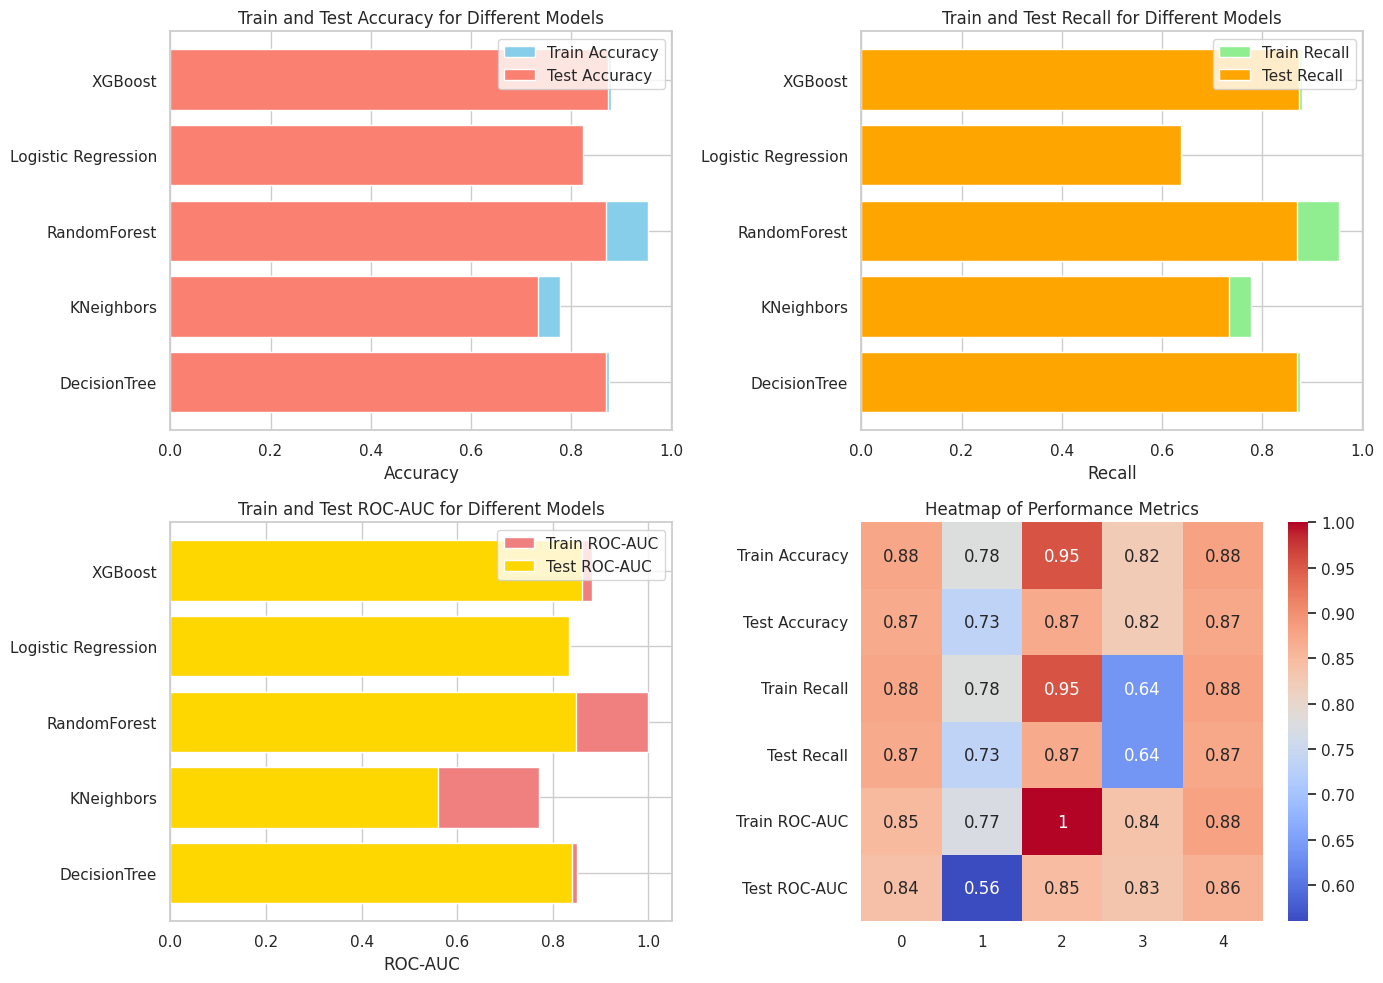

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for the DataFrame
data = {
    "Model": ["DecisionTree", "KNeighbors", "RandomForest", "Logistic Regression", "XGBoost"],
    "Best Parameters": [
        "{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}",
        "{'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}",
        "{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}",
        "{'C': 1.0, 'solver': 'lbfgs', 'penalty': 'l2', 'class_weight': 'balanced'}",
        "{'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}"
    ],
    "Train Time (s)": [4.234, 35.697, 38.843, 3.933, 601.726],
    "Train Accuracy": [0.876, 0.779, 0.955, 0.823, 0.88],
    "Test Accuracy": [0.870, 0.735, 0.870, 0.824, 0.874],
    "Train Recall": [0.876, 0.779, 0.955, 0.638, 0.88],
    "Test Recall": [0.870, 0.735, 0.870, 0.639, 0.874],
    "Train ROC-AUC": [0.850, 0.772, 1.000, 0.837, 0.881],
    "Test ROC-AUC": [0.841, 0.560, 0.848, 0.834, 0.861]
}

df_final = pd.DataFrame(data)

# Set up the plot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # Reduced the grid to 2x2

# Bar plot for Train and Test Accuracy
axes[0, 0].barh(df_final['Model'], df_final['Train Accuracy'], color='skyblue', label='Train Accuracy')
axes[0, 0].barh(df_final['Model'], df_final['Test Accuracy'], color='salmon', label='Test Accuracy')
axes[0, 0].set_xlabel('Accuracy')
axes[0, 0].set_title('Train and Test Accuracy for Different Models')
axes[0, 0].legend()

# Bar plot for Train and Test Recall
axes[0, 1].barh(df_final['Model'], df_final['Train Recall'], color='lightgreen', label='Train Recall')
axes[0, 1].barh(df_final['Model'], df_final['Test Recall'], color='orange', label='Test Recall')
axes[0, 1].set_xlabel('Recall')
axes[0, 1].set_title('Train and Test Recall for Different Models')
axes[0, 1].legend()

# Bar plot for Train and Test ROC-AUC
axes[1, 0].barh(df_final['Model'], df_final['Train ROC-AUC'], color='lightcoral', label='Train ROC-AUC')
axes[1, 0].barh(df_final['Model'], df_final['Test ROC-AUC'], color='gold', label='Test ROC-AUC')
axes[1, 0].set_xlabel('ROC-AUC')
axes[1, 0].set_title('Train and Test ROC-AUC for Different Models')
axes[1, 0].legend()

# Heatmap of the performance metrics
heatmap_data = df_final[['Train Accuracy', 'Test Accuracy', 'Train Recall', 'Test Recall', 'Train ROC-AUC', 'Test ROC-AUC']]
sns.heatmap(heatmap_data.T, annot=True, cmap='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Heatmap of Performance Metrics')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()


# Conclusion

**Random Forest** performed the best with a Train ROC-AUC of 1.0 and Test ROC-AUC of 0.848. The hyperparameter tuning used for Random Forest included max_depth=None, min_samples_split=5, and n_estimators=100, which contributed to its strong performance on both the training and test sets.

**XGBoost** also showed strong performance with a Test ROC-AUC of 0.861, but required significant training time (601.7 seconds). The hyperparameters optimized were learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8, and colsample_bytree=1.0, which helped improve its test performance.

**Logistic Regression** had a lower Train Recall (0.638), and its hyperparameters (C=1.0, solver='lbfgs', penalty='l2', class_weight='balanced') were optimized, but the model struggled with correctly identifying positive cases during training.

**KNeighbors** cperformed the worst with Test ROC-AUC of 0.560. Its hyperparameters (n_neighbors=7, weights='uniform', metric='euclidean') did not lead to competitive performance compared to other models.

Overall, **Random Forest** balances high performance across all metrics, including accuracy, recall, and ROC-AUC, making it the most well-rounded model.



